<a href="https://colab.research.google.com/github/iqra-creator/DEN/blob/main/Task%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluation on Training Data
Confusion Matrix:
[[    0     0]
 [ 5155 46417]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.90      0.95     51572

    accuracy                           0.90     51572
   macro avg       0.50      0.45      0.47     51572
weighted avg       1.00      0.90      0.95     51572


Evaluation on Test Data
Confusion Matrix:
[[    0     0]
 [ 1322 11571]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.90      0.95     12893

    accuracy                           0.90     12893
   macro avg       0.50      0.45      0.47     12893
weighted avg       1.00      0.90      0.95     12893



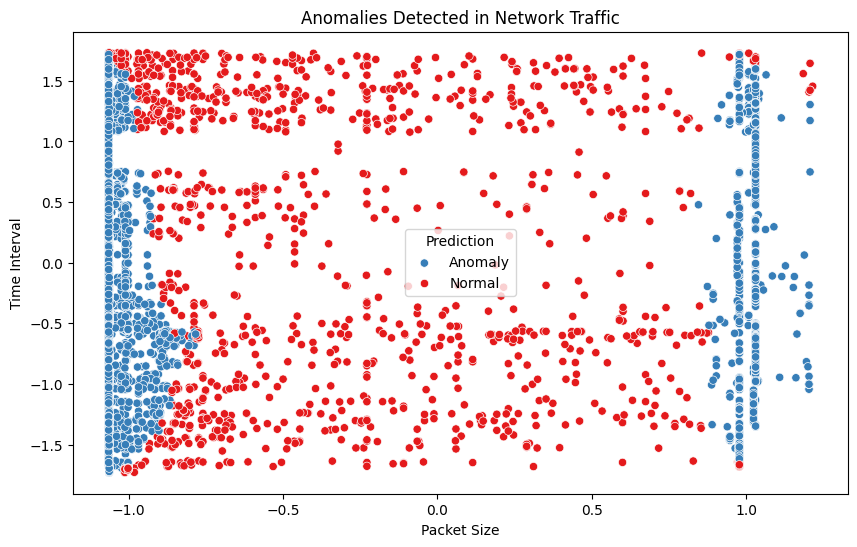

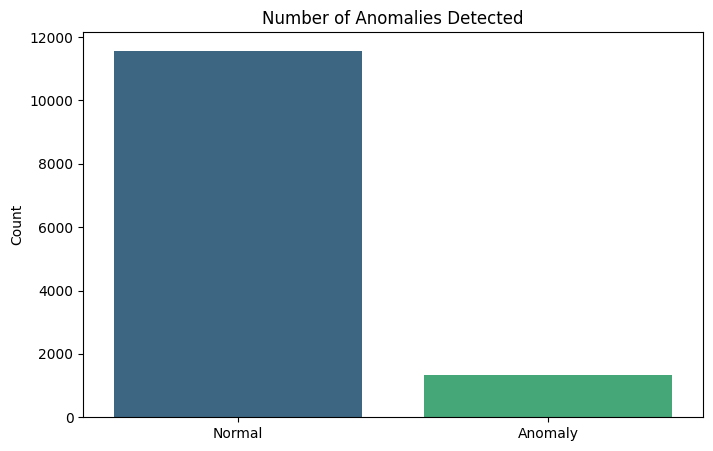

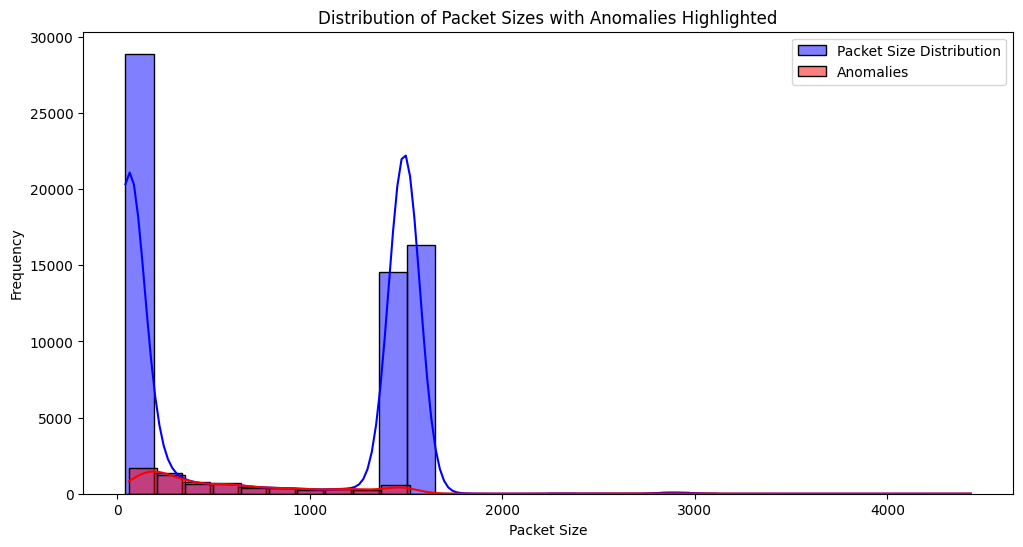

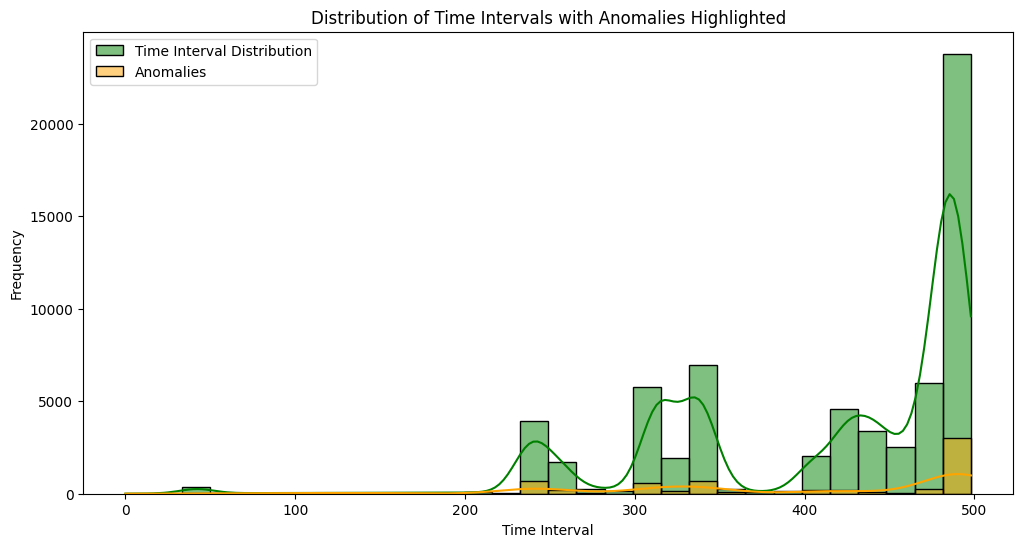

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv('/content/Network Traffic.csv')
data.fillna(method='ffill', inplace=True)

# Feature extraction (e.g., packet size, time intervals)
features = data[['packet_size', 'time_interval']]

# Label encoding categorical columns
categorical_columns = ['packet_size', 'time_interval']
for col in categorical_columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])

# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

# Isolation Forest model for anomaly detection
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(X_train)

# Predict anomalies
y_pred_train = isolation_forest.predict(X_train)
y_pred_test = isolation_forest.predict(X_test)

# Mapping prediction output: 1 indicates normal, -1 indicates anomaly
y_pred_train = [1 if x == 1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == 1 else 0 for x in y_pred_test]

# Evaluation Metrics
print("Evaluation on Training Data")
print("Confusion Matrix:")
print(confusion_matrix(np.ones(len(y_pred_train)), y_pred_train))
print("\nClassification Report:")
print(classification_report(np.ones(len(y_pred_train)), y_pred_train))

print("\nEvaluation on Test Data")
print("Confusion Matrix:")
print(confusion_matrix(np.ones(len(y_pred_test)), y_pred_test))
print("\nClassification Report:")
print(classification_report(np.ones(len(y_pred_test)), y_pred_test))

# Visualization
plt.figure(figsize=(10, 6))
# Use X_test which has the same size as y_pred_test
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred_test, palette="Set1", legend='full')
plt.title("Anomalies Detected in Network Traffic")
plt.xlabel("Packet Size")
plt.ylabel("Time Interval")
plt.legend(title='Prediction', labels=['Anomaly', 'Normal'])
plt.show()

# Bar Chart of Number of Anomalies
labels = ['Normal', 'Anomaly']
sizes = [np.sum(y_pred_test), len(y_pred_test) - np.sum(y_pred_test)]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=sizes, palette='viridis')
plt.title('Number of Anomalies Detected')
plt.ylabel('Count')
plt.show()

# Distribution Plot of Packet Size
plt.figure(figsize=(12, 6))
sns.histplot(data['packet_size'], kde=True, color='blue', bins=30, label='Packet Size Distribution')

# Create a boolean mask based on the predictions for the entire dataset
anomaly_mask = np.array(isolation_forest.predict(features_scaled)) == -1

# Use the anomaly_mask to filter the DataFrame for anomalies
sns.histplot(data.loc[anomaly_mask, 'packet_size'], kde=True, color='red', label='Anomalies', bins=30)

plt.title('Distribution of Packet Sizes with Anomalies Highlighted')
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Distribution Plot of Time Intervals
plt.figure(figsize=(12, 6))
sns.histplot(data['time_interval'], kde=True, color='green', bins=30, label='Time Interval Distribution')

# Use the anomaly_mask to filter the DataFrame for anomalies
sns.histplot(data.loc[anomaly_mask, 'time_interval'], kde=True, color='orange', label='Anomalies', bins=30)

plt.title('Distribution of Time Intervals with Anomalies Highlighted')
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.legend()
plt.show()